In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import h5py
import sys
dirwork ='../scripts'
sys.path.append(dirwork)
import pmixSample

In [2]:
def plotResults(x, y, z, name_title , x_label_name='1000/T ',y_label_name='mass fraction CO',xtickvalues=None,ytickvalues=None,fs_title=22,fs_label=22,fs_tick=20):
    N = 5
    lista = np.logspace(-5,-3,N).tolist()
    for i in [-3,-2,-1]:
        lista += np.logspace(i,i+1,N).tolist()[1:]
    fig, ax2 = plt.subplots(figsize=(10,8), nrows=1)
    ax2.tricontour(x, y, z, levels=lista, linewidths=0.5,  colors='k',norm=colors.LogNorm())
    cntr2 = ax2.tricontourf(x, y, z,  levels=lista, cmap="RdBu_r",norm=colors.LogNorm())

    cbar=fig.colorbar(cntr2, ax=ax2)
    cbar.ax.tick_params(labelsize=fs_label) 
    ax2.set_title(name_title,fontsize=fs_title)
    plt.subplots_adjust(hspace=0.5)
    ax2.set_xlabel(x_label_name,fontsize=fs_label)
    ax2.set_ylabel(y_label_name,fontsize=fs_label)
    if xtickvalues is not None:
        ax2.set_xticks(xtickvalues)
    if ytickvalues is not None:
        ax2.set_yticks(ytickvalues)
    for tick in ax2.xaxis.get_major_ticks()+ax2.yaxis.get_major_ticks():
        tick.label.set_fontsize(fs_tick)
    return 

In [3]:
f = h5py.File('isoOctaneIgnDelayBlake.hdf5', 'r')

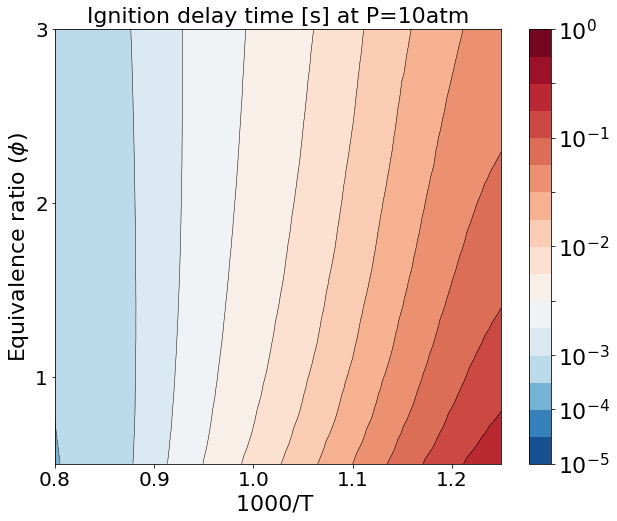

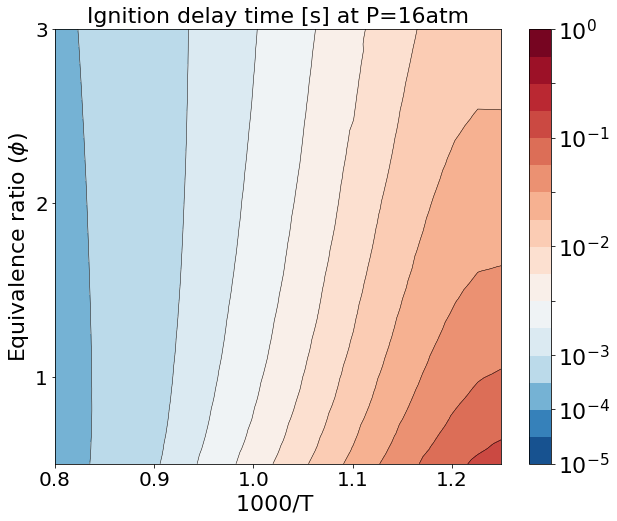

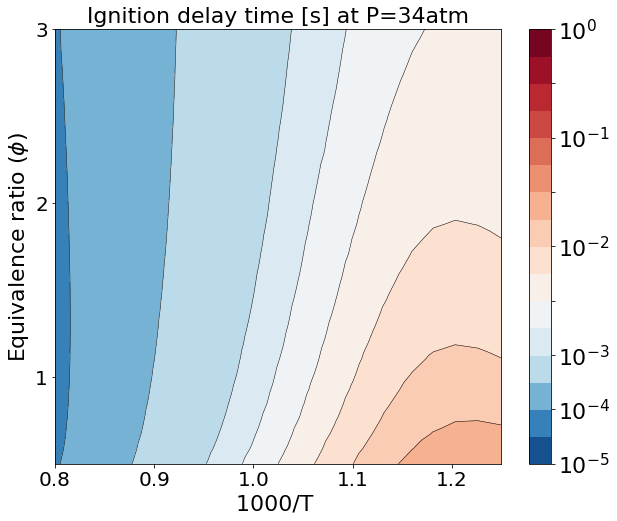

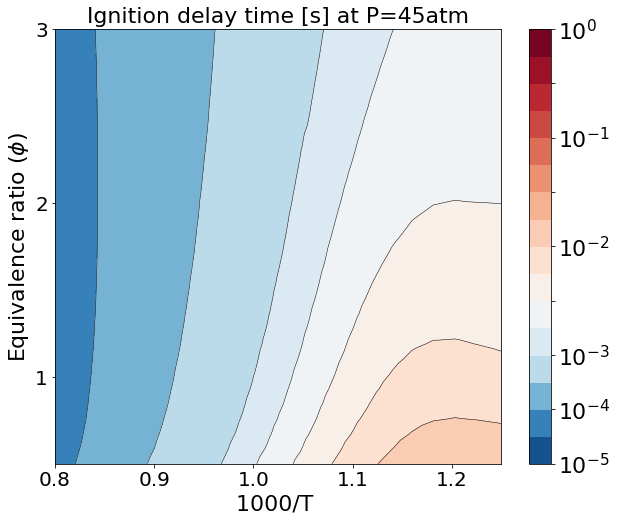

In [4]:
for p in [10, 16, 34, 45]:
    dirOutput = 'SA_900/'+str(p)+'atm/'
    sample = np.array(f.get('sample_'+str(p)+'atm'))
    IgnTime = np.array(f.get(str(p)+'atm'))
    Np = np.where((IgnTime>0))[0]
    x = 1000./sample[Np,0]#sample[Np,0];#
    Yo2 = sample[Np,3]
    phi = pmixSample.getPhifromYo2(8,Yo2)
    z = IgnTime[Np]
    name_value =  'Ignition delay time [s] at P=' + str(p) +'atm'
    xticks=[0.8,0.9,1,1.1,1.2]
    yticks=[1,2,3]
    plotResults(x, phi, z,name_value, y_label_name='Equivalence ratio ($\phi$)',xtickvalues=xticks,ytickvalues=yticks)
    plt.savefig('TempvsEquiRatio900IsoOctane'+ str(p) +'atm'+'.pdf')
f.close()    